# 7641 ML Assignment 2 Part 1

## Import Libraries

In [17]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

import pandas as pd
import numpy as np 
import mlrose
import time
import mlrose_hiive
import itertools
import matplotlib.pyplot as plt

## Randomized Optimization Algorithms

In [18]:
# Defining Fitness Functions
fitness_functions = [mlrose_hiive.FourPeaks(), mlrose_hiive.ContinuousPeaks(), mlrose_hiive.FlipFlop()]

### Hyperparameter Tuning 

In [19]:
# Randomized Hill Climbing

def rhc_tuning():
    rhc_best_param = None
    rhc_best_fitness_value = None

    for item in fitness_functions:
        for i in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
            opt_problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=item, maximize=True)
            rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose_hiive.random_hill_climb(opt_problem, 
                                                                                 max_attempts = 400, 
                                                                                 max_iters= 400, 
                                                                                 curve=True, 
                                                                                 random_state=1,
                                                                                 restarts = i)

            if not rhc_best_fitness_value:
                rhc_best_param = i
                rhc_best_fitness_value = rhc_best_fitness
            elif rhc_best_fitness > rhc_best_fitness_value:
                rhc_best_param = i
                rhc_best_fitness_value = rhc_best_fitness
        print("Best RHC parameters for {} = {}".format(item, str(rhc_best_param)))


In [20]:
rhc_tuning()

Best RHC parameters for <mlrose_hiive.fitness.four_peaks.FourPeaks object at 0x000002E22C5140A0> = 80
Best RHC parameters for <mlrose_hiive.fitness.continuous_peaks.ContinuousPeaks object at 0x000002E22C514D60> = 70
Best RHC parameters for <mlrose_hiive.fitness.flip_flop.FlipFlop object at 0x000002E22C514190> = 70


In [21]:
# Simulated Annealing

def sa_tuning():
    sa_params = [
       [1, 2, 4, 8, 16, 32, 64],
       [0.1, 0.2, 0.4, 0.8],
       [0.001, 0.01, 0.1, 1]
    ]

    sa_best_param = None
    sa_best_fitness_value = None

    for item in fitness_functions:
        for i in itertools.product(*sa_params):
            sa_problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=item, maximize=True)
            decay = mlrose_hiive.GeomDecay(init_temp = i[0], decay=i[1], min_temp=i[2])
            sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose_hiive.simulated_annealing(
                                                        sa_problem, 
                                                        max_attempts=400, 
                                                        max_iters=400, 
                                                        curve=True, 
                                                        random_state=1,
                                                        schedule=decay)

            if not sa_best_fitness_value:
                sa_best_param = i
                sa_best_fitness_value = sa_best_fitness
            elif sa_best_fitness > sa_best_fitness_value:
                sa_best_param = i
                sa_best_fitness_value = sa_best_fitness
        print("Best SA parameters for {} = {}".format(item, str(sa_best_param)))
        

In [22]:
sa_tuning()

Best SA parameters for <mlrose_hiive.fitness.four_peaks.FourPeaks object at 0x000002E22C5140A0> = (1, 0.1, 1)
Best SA parameters for <mlrose_hiive.fitness.continuous_peaks.ContinuousPeaks object at 0x000002E22C514D60> = (1, 0.1, 0.001)
Best SA parameters for <mlrose_hiive.fitness.flip_flop.FlipFlop object at 0x000002E22C514190> = (64, 0.8, 0.001)


In [23]:
# Genetic Algorithm 

def ga_tuning():
    ga_hyperparams = [
       [200, 400, 700, 900],
       [0.2, 0.4, 0.6, 0.8]
    ]


    ga_best_param = None
    ga_best_fitness_value = None

    for item in fitness_functions:
        for i in itertools.product(*ga_hyperparams):
            ga_problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=item, maximize=True)
            ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose_hiive.genetic_alg(
                                                        ga_problem, 
                                                        max_attempts=400, 
                                                        max_iters=400, 
                                                        curve=True, 
                                                        random_state=1,
                                                        pop_size=i[0],
                                                        mutation_prob=i[1])

            if not ga_best_fitness_value:
                ga_best_param = i
                ga_best_fitness_value = ga_best_fitness
            elif ga_best_fitness > ga_best_fitness_value:
                ga_best_param = i
                ga_best_fitness_value = ga_best_fitness
        print("Best GA parameters for {} = {}".format(item, str(ga_best_param)))
        

In [24]:
ga_tuning()

Best GA parameters for <mlrose_hiive.fitness.four_peaks.FourPeaks object at 0x000002E22C5140A0> = (200, 0.2)
Best GA parameters for <mlrose_hiive.fitness.continuous_peaks.ContinuousPeaks object at 0x000002E22C514D60> = (200, 0.2)
Best GA parameters for <mlrose_hiive.fitness.flip_flop.FlipFlop object at 0x000002E22C514190> = (200, 0.2)


In [25]:
# MIMIC

def mimic_tuning():
    
    mimic_hyperparams = [
       [200, 500, 900],
       [0.25, 0.5, 0.75]
    ]
    
    mimic_best_param = None
    mimic_best_fitness_value = None

    for item in fitness_functions:
        for i in itertools.product(*mimic_hyperparams):
            mimic_problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=item, maximize=True)
            mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose_hiive.mimic(
                                                                mimic_problem, 
                                                                max_attempts = 10, 
                                                                max_iters = 10,  
                                                                curve = True, 
                                                                random_state =1,
                                                                pop_size=i[0],
                                                                keep_pct = i[1]
                                                                )
            if not mimic_best_fitness_value:
                mimic_best_param = i
                mimic_best_fitness_value = mimic_best_fitness
            elif mimic_best_fitness > mimic_best_fitness_value:
                mimic_best_param = i
                mimic_best_fitness_value = mimic_best_fitness
        print("Best MIMIC parameters for {} = {}".format(item, str(mimic_best_param)))
        

In [26]:
mimic_tuning()

Best MIMIC parameters for <mlrose_hiive.fitness.four_peaks.FourPeaks object at 0x000002E22C5140A0> = (200, 0.25)
Best MIMIC parameters for <mlrose_hiive.fitness.continuous_peaks.ContinuousPeaks object at 0x000002E22C514D60> = (200, 0.25)
Best MIMIC parameters for <mlrose_hiive.fitness.flip_flop.FlipFlop object at 0x000002E22C514190> = (200, 0.25)


## Solving Optimization Problems

In [64]:
# Defining Max Attempts and Max Iterations 
max_attempts = 100
max_iterations = 100

### Helper Functions

In [29]:
# Randomized Hill Climbing
def rhc(problem, max_attempts, max_iterations, restarts, title):
    start_time = time.time()
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose_hiive.random_hill_climb(problem = problem, 
                                                                             max_attempts = max_attempts, 
                                                                             max_iters= max_iterations, 
                                                                             curve=True, 
                                                                             random_state=1,
                                                                             restarts = restarts)
    end_time = time.time()
    rhc_result_time = end_time - start_time
    

    fitnessIteration(max_iterations, rhc_fitness_curve, 'RHC', title)
    
    
    return "Randomized Hill Climbing total time: " + str(rhc_result_time)

In [30]:
# Simulated Annealing
def sa(problem, max_attempts, max_iterations, schedule, title):
    start_time = time.time()
    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose_hiive.simulated_annealing(
                                                problem = problem, 
                                                max_attempts = max_attempts, 
                                                max_iters = max_iterations, 
                                                curve=True,
                                                random_state=1,
                                                schedule=mlrose.GeomDecay(init_temp = schedule[0], decay = schedule[1], min_temp = schedule[2]))
    end_time = time.time()
    sa_result_time = end_time - start_time
    
    
    fitnessIteration(max_iterations, sa_fitness_curve, 'SA', title)
    
    
    return "Simulated Annealing total time: " + str(sa_result_time)

In [52]:
# Genetic Algorithm 
def ga(problem, max_attempts, max_iterations, pop_size, mutation_prob, title):
    start_time = time.time()
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose_hiive.genetic_alg(
                                                problem = problem, 
                                                max_attempts=max_attempts, 
                                                max_iters=max_iterations, 
                                                curve=True, 
                                                random_state=1,
                                                pop_size=pop_size,
                                                mutation_prob=mutation_prob)
    end_time = time.time()
    ga_result_time = end_time - start_time
    
    
    fitnessIteration(max_iterations, ga_fitness_curve, 'GA', title)
#     evaIteration(max_iterations, ga_fitness_curve, 'GA', title)
    
    
    
    return "Genetic Algorithm total time: "+ str(ga_result_time)

In [32]:
# MIMIC
def mimic(problem, m_pop_size, keep_pct, title):
    start_time = time.time()
    mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose_hiive.mimic(
                                                        problem = problem, 
                                                        max_attempts = 100, 
                                                        max_iters = 100,  
                                                        curve = True, 
                                                        random_state =1,
                                                        pop_size=m_pop_size,
                                                        keep_pct = keep_pct
                                                        )
    end_time = time.time()
    mimic_result_time = end_time - start_time
    
    
    fitnessIteration(max_iterations, mimic_fitness_curve, 'MIMIC', title)
    
    
    return "MIMIC total time: " + str(mimic_result_time)

In [33]:
# Fitness vs Iteration Plot
def fitnessIteration(max_iterations, curve, label, title):
    iter_range = range(1, max_iterations + 1)
    result = [item[0] for item in curve]
    plt.plot(iter_range, result, label=label, color='green')
    plt.title('Fitness vs Iteration: ' + title)
    plt.legend(loc="best")
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")

In [38]:
def evaIteration(max_iterations, curve, label, title):
    iter_range = range(1, max_iterations + 1)
    result = [item[1] for item in curve]
    plt.plot(iter_range, result, label=label, color='green')
    plt.title('Fitness vs Iteration: ' + title)
    plt.legend(loc="best")
    plt.xlabel("Iterations")
    plt.ylabel("Evaluation")

In [34]:
def algo_comparison(problem, title, restarts, schedule, pop_size, mutation_prob, m_pop_size, keep_pct):
    # Randomized Hill Climbing
    rhc_start_time = time.time()
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose_hiive.random_hill_climb(problem = problem, 
                                                                             max_attempts = 100, 
                                                                             max_iters= 100, 
                                                                             curve=True, 
                                                                             random_state=1,
                                                                             restarts = restarts)
    rhc_end_time = time.time()
    rhc_result_time = rhc_end_time - rhc_start_time
    
    
    # Simulated Annealing
    sa_start_time = time.time()
    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose_hiive.simulated_annealing(
                                                problem = problem, 
                                                max_attempts = 100, 
                                                max_iters = 100, 
                                                curve=True,
                                                random_state=1,
                                                schedule=mlrose.GeomDecay(init_temp = schedule[0], decay = schedule[1], min_temp = schedule[2]))
    sa_end_time = time.time()
    sa_result_time = sa_end_time - sa_start_time   
    
    
    # Genetic Algorithm 
    ga_start_time = time.time()
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose_hiive.genetic_alg(
                                                problem = problem, 
                                                max_attempts=100, 
                                                max_iters=100, 
                                                curve=True, 
                                                random_state=1,
                                                pop_size=pop_size,
                                                mutation_prob=mutation_prob)
    
    ga_end_time = time.time()
    ga_result_time = ga_end_time - ga_start_time 
    
    
    # MIMIC
    mimic_start_time = time.time()
    mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose_hiive.mimic(
                                                        problem = problem, 
                                                        max_attempts = 100, 
                                                        max_iters = 100,  
                                                        curve = True, 
                                                        random_state =1,
                                                        pop_size=m_pop_size,
                                                        keep_pct = keep_pct
                                                        )
    

    mimic_end_time = time.time()
    mimic_result_time = mimic_end_time - mimic_start_time 
    
    
    iterations = range(1, 101)
    
    # Getting the fitness score from the fittness curve arraylist
    rhc_result = [item[0] for item in rhc_fitness_curve]
    sa_result = [item[0] for item in sa_fitness_curve]
    ga_result = [item[0] for item in ga_fitness_curve]
    mimic_result = [item[0] for item in mimic_fitness_curve]
    
    # Plotting the curves together to see the differences
    plt.plot(iterations, rhc_result, label='RHC', color='green')
    plt.plot(iterations, sa_result, label='SA', color='red')
    plt.plot(iterations, ga_result, label='GA', color='blue')
    plt.plot(iterations, mimic_result, label='MIMIC', color='orange')
    plt.title(title)
    plt.legend(loc="best")
    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    
    
    print('Algorithm Total Times: ')
    print('Randomized Hill Climbing: ' + str(rhc_result_time))
    print('Simulated Annealing: ' + str(sa_result_time))
    print('Genetic Algorithm: ' + str(ga_result_time))
    print('MIMIC: ' + str(mimic_result_time))


In [35]:
def algo_evaluation(problem, title, restarts, schedule, pop_size, mutation_prob, m_pop_size, keep_pct):
    # Randomized Hill Climbing
    rhc_start_time = time.time()
    rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose_hiive.random_hill_climb(problem = problem, 
                                                                             max_attempts = 100, 
                                                                             max_iters= 100, 
                                                                             curve=True, 
                                                                             random_state=1,
                                                                             restarts = restarts)
    rhc_end_time = time.time()
    rhc_result_time = rhc_end_time - rhc_start_time
    
    
    # Simulated Annealing
    sa_start_time = time.time()
    sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose_hiive.simulated_annealing(
                                                problem = problem, 
                                                max_attempts = 100, 
                                                max_iters = 100, 
                                                curve=True,
                                                random_state=1,
                                                schedule=mlrose.GeomDecay(init_temp = schedule[0], decay = schedule[1], min_temp = schedule[2]))
    sa_end_time = time.time()
    sa_result_time = sa_end_time - sa_start_time   
    
    
    # Genetic Algorithm 
    ga_start_time = time.time()
    ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose_hiive.genetic_alg(
                                                problem = problem, 
                                                max_attempts=100, 
                                                max_iters=100, 
                                                curve=True, 
                                                random_state=1,
                                                pop_size=pop_size,
                                                mutation_prob=mutation_prob)
    
    ga_end_time = time.time()
    ga_result_time = ga_end_time - ga_start_time 
    
    
    # MIMIC
    mimic_start_time = time.time()
    mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose_hiive.mimic(
                                                        problem = problem, 
                                                        max_attempts = 100, 
                                                        max_iters = 100,  
                                                        curve = True, 
                                                        random_state =1,
                                                        pop_size=m_pop_size,
                                                        keep_pct = keep_pct
                                                        )
    

    mimic_end_time = time.time()
    mimic_result_time = mimic_end_time - mimic_start_time 
    
    
    iterations = range(1, 101)
    
    # Getting the fitness score from the fittness curve arraylist
    rhc_result = [item[1] for item in rhc_fitness_curve]
    sa_result = [item[1] for item in sa_fitness_curve]
    ga_result = [item[1] for item in ga_fitness_curve]
    mimic_result = [item[1] for item in mimic_fitness_curve]
    
    # Plotting the curves together to see the differences
    plt.plot(iterations, rhc_result, label='RHC', color='green')
    plt.plot(iterations, sa_result, label='SA', color='red')
    plt.plot(iterations, ga_result, label='GA', color='blue')
    plt.plot(iterations, mimic_result, label='MIMIC', color='orange')
    plt.title(title)
    plt.legend(loc="best")
    plt.xlabel("Iterations")
    plt.ylabel("Evaluation")
    
    
    print('Algorithm Total Times: ')
    print('Randomized Hill Climbing: ' + str(rhc_result_time))
    print('Simulated Annealing: ' + str(sa_result_time))
    print('Genetic Algorithm: ' + str(ga_result_time))
    print('MIMIC: ' + str(mimic_result_time))

### Four Peaks Problem

In [11]:
# Defining Discrete Problem Object
FPP_object = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness_functions[0], maximize=True)

In [ ]:
# Randomized Hill Climbing
rhc(FPP_object, max_attempts, max_iterations, 80, 'Four Peaks')

'Simulated Annealing total time: 0.003002643585205078'

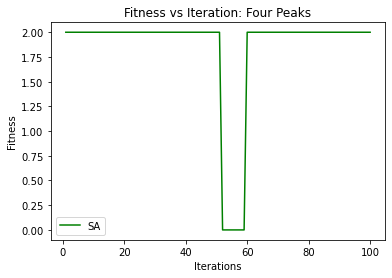

In [50]:
# Simulated Annealing
FPP_schdeule = [1, 0.1, 1]
sa(FPP_object, max_attempts, max_iterations, FPP_schdeule, 'Four Peaks')

'Genetic Algorithm total time: 0.7977256774902344'

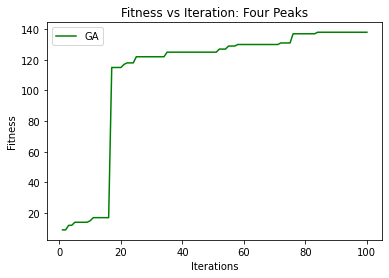

In [53]:
# Genetic Algorithm 
ga(FPP_object, max_attempts, max_iterations, 100, 0.2, 'Four Peaks')

In [ ]:
# MIMIC
mimic(FPP_object, 0.25, 'Four Peaks')

Algorithm Total Times: 
Randomized Hill Climbing: 0.15012788772583008
Simulated Annealing: 0.0040035247802734375
Genetic Algorithm: 1.5635886192321777
MIMIC: 343.64394211769104


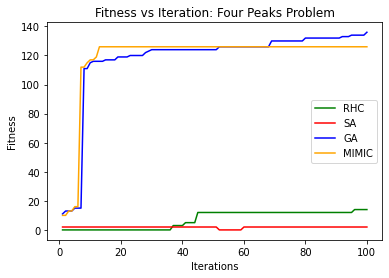

In [36]:
# All Algorithm Comparison
algo_comparison(FPP_object, 'Fitness vs Iteration: Four Peaks Problem', 80, [1, 0.1, 1], 200, 0.2, 200, 0.25)

Algorithm Total Times: 
Randomized Hill Climbing: 0.1511380672454834
Simulated Annealing: 0.0030024051666259766
Genetic Algorithm: 1.6164700984954834
MIMIC: 345.86822986602783


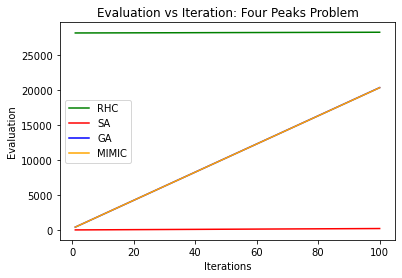

In [37]:
algo_evaluation(FPP_object, 'Evaluation vs Iteration: Four Peaks Problem', 80, [1, 0.1, 1], 200, 0.2, 200, 0.25)

### Continuous Peaks Problem

In [45]:
# Defining Discrete Problem Object
CPP_object = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness_functions[1], maximize=True)

In [ ]:
# Randomized Hill Climbing
rhc(CPP_object, max_attempts, max_iterations, 70, 'Continuous Peaks')


'Simulated Annealing total time: 0.020018339157104492'

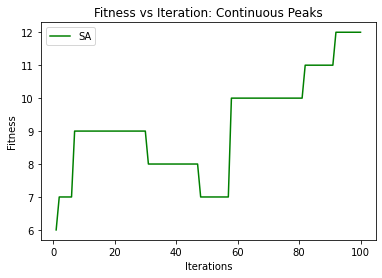

In [58]:
# Simulated Annealing
CPP_schdeule = [1, 0.1, 1]
sa(CPP_object, max_attempts, max_iterations, CPP_schdeule, 'Continuous Peaks')

In [ ]:
# Genetic Algorithm 
ga(CPP_object, max_attempts, max_iterations, 100, 0.2, 'Continuous Peaks')

In [ ]:
# MIMIC
mimic(CPP_object, 0.5, 'Continuous Peaks')

Algorithm Total Times: 
Randomized Hill Climbing: 0.6595983505249023
Simulated Annealing: 0.016015052795410156
Genetic Algorithm: 2.7565081119537354
MIMIC: 328.77205538749695


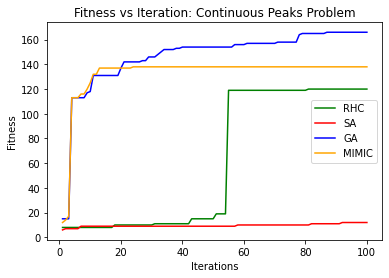

In [46]:
# All Algorithm Comparison
algo_comparison(CPP_object, 'Fitness vs Iteration: Continuous Peaks Problem', 70, [1, 0.1, 0.001], 200, 0.2, 200, 0.25)

Algorithm Total Times: 
Randomized Hill Climbing: 0.14212989807128906
Simulated Annealing: 0.0030014514923095703
Genetic Algorithm: 1.5654244422912598
MIMIC: 341.36368060112


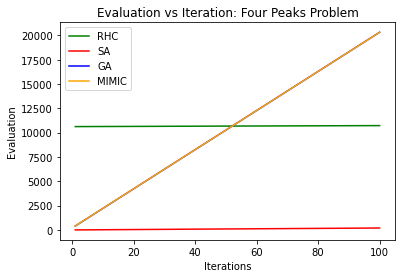

In [47]:
algo_evaluation(FPP_object, 'Evaluation vs Iteration: Four Peaks Problem', 70, [1, 0.1, 0.001], 200, 0.2, 200, 0.25)

### Flip Flop Problem

In [55]:
# Defining Discrete Problem Object
FFP_object = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness_functions[2], maximize=True)

'Randomized Hill Climbing total time: 2.4275431632995605'

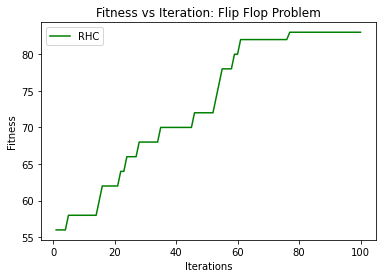

In [65]:
# Randomized Hill Climbing
rhc(FFP_object, max_attempts, max_iterations, 70, 'Flip Flop Problem')

'Simulated Annealing total time: 0.39835429191589355'

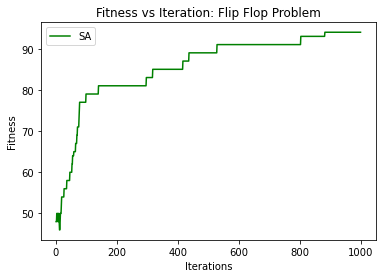

In [61]:
# Simulated Annealing
FFP_schdeule = [64, 0.8, 0.001]
sa(FFP_object, max_attempts, max_iterations, FFP_schdeule, 'Flip Flop Problem')

'Genetic Algorithm total time: 3.5872631072998047'

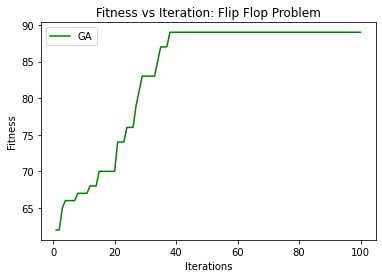

In [66]:
# Genetic Algorithm 
ga(FFP_object, max_attempts, max_iterations, 100, 0.2, 'Flip Flop Problem')

In [ ]:
# MIMIC
mimic(FFP_object, 0.25, 'Flip Flop Problem')

Algorithm Total Times: 
Randomized Hill Climbing: 2.4454874992370605
Simulated Annealing: 0.052047014236450195
Genetic Algorithm: 7.081442356109619
MIMIC: 327.0940799713135


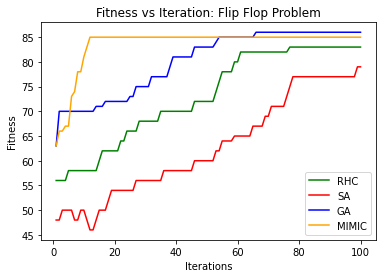

In [56]:
# All Algorithm Comparison
algo_comparison(FFP_object, 'Fitness vs Iteration: Flip Flop Problem', 70, [64, 0.8, 0.001], 200, 0.2, 200, 0.25)

Algorithm Total Times: 
Randomized Hill Climbing: 0.1331188678741455
Simulated Annealing: 0.0030031204223632812
Genetic Algorithm: 1.5674264430999756
MIMIC: 342.7644703388214


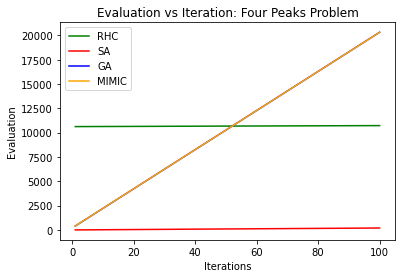

In [57]:
algo_evaluation(FPP_object, 'Evaluation vs Iteration: Four Peaks Problem', 70, [64, 0.8, 0.001], 200, 0.2, 200, 0.25)